Training CNN on MNIST dataset...
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 99ms/step - accuracy: 0.8134 - loss: 0.6052 - val_accuracy: 0.9812 - val_loss: 0.0643
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.9719 - loss: 0.0951 - val_accuracy: 0.9875 - val_loss: 0.0421
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 102ms/step - accuracy: 0.9802 - loss: 0.0653 - val_accuracy: 0.9895 - val_loss: 0.0391
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 98ms/step - accuracy: 0.9852 - loss: 0.0499 - val_accuracy: 0.9902 - val_loss: 0.0362
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.9877 - loss: 0.0411 - val_accuracy: 0.9903 - val_loss: 0.0310

Model trained successfully! Test Accuracy: 99.11%

Please upload a digit image (JPG or PNG format)...


Saving download.png to download.png

File uploaded successfully: download.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


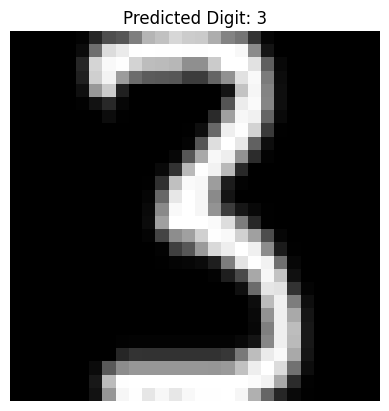


Predicted Digit: 3


In [2]:
# ===========================================================
# CNN Digit Recognition Model (User Upload Only)
# ===========================================================

from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# ===========================================================
# 1. TRAIN CNN ON MNIST
# ===========================================================
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Training CNN on MNIST dataset...")
model.fit(x_train, y_train, validation_split=0.1, epochs=5, batch_size=128, verbose=1)

# Evaluate performance
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nModel trained successfully! Test Accuracy: {acc*100:.2f}%")

# ===========================================================
# 2. UPLOAD USER IMAGE
# ===========================================================
print("\nPlease upload a digit image (JPG or PNG format)...")
uploaded = files.upload()

# Get filename
filename = list(uploaded.keys())[0]
print(f"\nFile uploaded successfully: {filename}")

# ===========================================================
# 3. PREPROCESS IMAGE
# ===========================================================
# Open and preprocess
img = Image.open(filename).convert('L')  # Convert to grayscale
img = img.resize((28, 28))               # Resize to 28x28
img_arr = np.array(img)

# Invert if background is white
if np.mean(img_arr) > 127:
    img_arr = 255 - img_arr

# Normalize and reshape for CNN
img_arr = img_arr.astype('float32') / 255.0
img_arr = np.expand_dims(img_arr, axis=(0, -1))

# ===========================================================
# 4. PREDICT DIGIT
# ===========================================================
prediction = np.argmax(model.predict(img_arr))
plt.imshow(img, cmap='gray')
plt.title(f"Predicted Digit: {prediction}")
plt.axis('off')
plt.show()

print(f"\nPredicted Digit: {prediction}")
